In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Here I will be attempting to use Standard Scaling to transform a feature so that it is close to normally distributed, this is useful for machine learning as those algorithms work best on normally distributed data. It will leave the data with a mean of close to 0 and a standard deviation of 1. It is useful when 2 sets of data that you want to compare are on different scales, for example age being from 0-100 with income being from 10000 to 150000. 

In [3]:
df = pd.DataFrame({
    'age': [25,35,76,46,56,35,43,64,23,34],
    'number_of_clothes': [53,14,25,64,24,75,47,36,54,75],
    'number_of_books': [75,35,64,74,34,55,43,63,25,26],
    'income': [150000,56000,35000,78000,120000,49000,23000,36000,85000,68000]
})
df.head()

,age,number_of_clothes,number_of_books,income
0,25,53,75,150000
1,35,14,35,56000
2,76,25,64,35000
3,46,64,74,78000
4,56,24,34,120000


Below we can see a fairly normal distribution with all the information clear to read. 

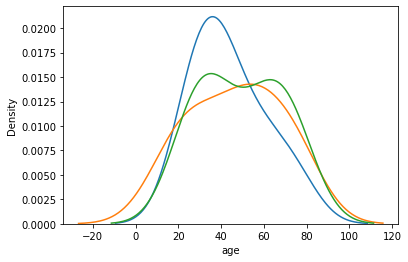

In [4]:
sns.kdeplot(df.age)
sns.kdeplot(df.number_of_clothes)
sns.kdeplot(df.number_of_books)
plt.show()

However, if we try to plot this with income we can see that everything goes wrong, this is because the scale of income is far bigger than the others and so pushes everything sharply to the left. We can fix this using the Standard Scaler, it will put them all into comparable values so we can plot them together. 

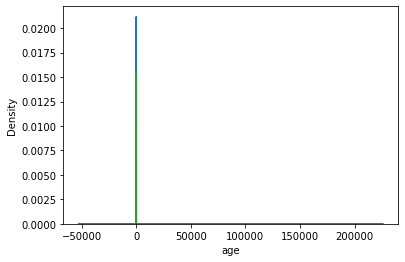

In [5]:
plt.clf()
sns.kdeplot(df.age)
sns.kdeplot(df.number_of_clothes)
sns.kdeplot(df.number_of_books)
sns.kdeplot(df.income)
plt.show()

Here we have created a scaler object by calling StandardScaler, we then fit and transform this to the data (these steps can be done separately). We then take the array that produces and put them back into a dataframe for easy access. Now, we can plot these on a kdeplot for comparison.

In [6]:
scaler = StandardScaler()
df_s = scaler.fit_transform(df)
df_s = pd.DataFrame(df_s, columns=['age', 'number_of_clothes', 'number_of_books', 'income'])
df_s

,age,number_of_clothes,number_of_books,income
0,-1.151756,0.308731,1.405321,2.106723
1,-0.535844,-1.602460,-0.790493,-0.368676
2,1.989398,-1.063406,0.801472,-0.921691
3,0.141660,0.847785,1.350426,0.210672
4,0.757572,-1.112411,-0.845389,1.316702
5,-0.535844,1.386838,0.307414,-0.553015
6,-0.043114,0.014701,-0.351330,-1.237700
7,1.250302,-0.524352,0.746577,-0.895357
8,-1.274939,0.357736,-1.339447,0.395010
9,-0.597435,1.386838,-1.284551,-0.052668


Here we have managed to put all the distributions onto the same plot as well as normally distribute them for easier machine learning. We can also check the means and standard deviations to make sure they have been properly normalized.

<Figure size 432x288 with 0 Axes>

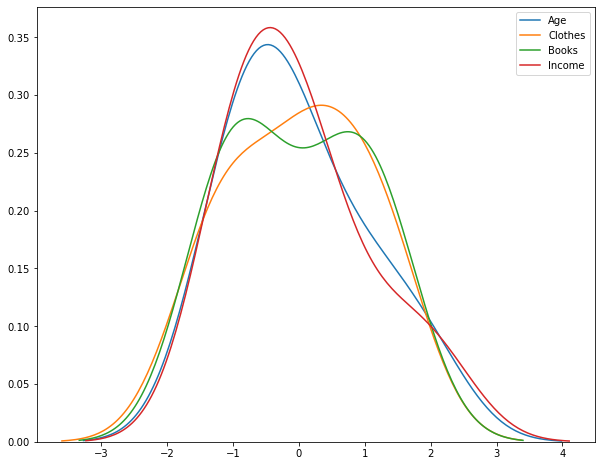

In [7]:
plt.clf()
plt.figure(figsize=(10,8))
sns.kdeplot(df_s['age'], label='Age')
sns.kdeplot(df_s['number_of_clothes'], label='Clothes')
sns.kdeplot(df_s['number_of_books'], label='Books')
sns.kdeplot(df_s['income'], label='Income')
plt.ylabel('')
plt.xlabel('')
plt.legend()
plt.show()

All good! 

In [8]:
print(df_s.age.mean(), df_s.age.std())
print(df_s.number_of_clothes.mean(), df_s.number_of_clothes.std())
print(df_s.number_of_books.mean(), df_s.number_of_books.std())
print(df_s.income.mean(), df_s.income.std())

-1.7763568394002506e-16 1.0540925533894596
-8.881784197001253e-17 1.0540925533894596
1.1102230246251565e-16 1.0540925533894596
4.85722573273506e-17 1.0540925533894598


Here I am experimenting with more data transformation techniques. StandardScaler already assumes some degree of normal distribution with the data that it works with. When I applied it to the loan data that is skewed right, it scaled it down but did not affect the skewness with the QQ plot showing a distinct positive curve.

In [9]:
loans = pd.read_csv('loans_income.csv')
loans.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


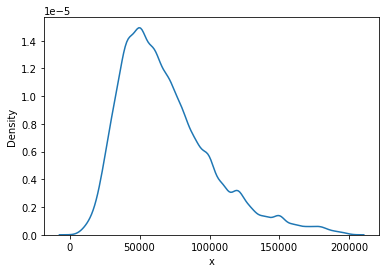

In [10]:
plt.clf()
sns.kdeplot(loans['x'])
plt.show()

In [12]:
loans_s = scaler.fit_transform(loans)
loans_s = pd.DataFrame(loans_s, columns=['income'])
loans_s.head()

,income
0,-0.053557
1,-0.509877
2,0.950346
3,0.304258
4,-0.964949


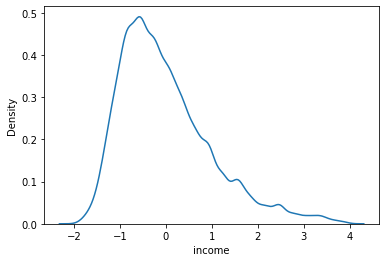

In [14]:
plt.clf()
sns.kdeplot(loans_s['income'])
plt.show()

In [19]:
from scipy import stats
from scipy.stats import probplot
import numpy as np

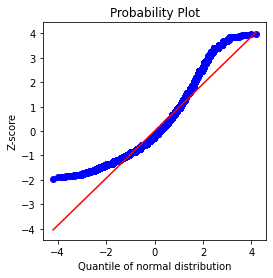

In [18]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(loans_s.income, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()

Here I apply the np.log tranformation function to the loan data. This only works on non-zero and non-negative data and has gotten the data closer to a Gaussian normal distribution, although the kdeplot does look a little skewed to the left now. The QQ plot has the appearance of a long-tailed distribution, this means that the majority of the data in the middle is normally distributed with more extreme values at the high and low end. 

In [34]:
loans_log = np.log(loans['x'])
loans_log.head()

0    11.112448
1    10.858999
2    11.512925
3    11.274186
4    10.519781
Name: x, dtype: float64

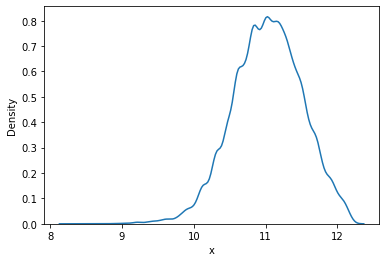

In [26]:
plt.clf()
sns.kdeplot(loans_log)
plt.show()

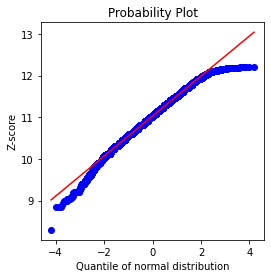

In [24]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(loans_log, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()

Here I use the PowerTransformer function from scikit learn. This appears to be more effective than the log transformation in getting the data to a normal Gaussian distribution. There are two methods available, Yeo-Johnson and Box-Cox. YJ can work on both negative and positive data whilst BC only works with positive data. The default in the function is YJ. As we can see it is more effective at normalising the lower tail of the data than log transformation but the higher end is still not fit to the normal distribution line. 

In [27]:
from sklearn.preprocessing import PowerTransformer

In [35]:
pt = PowerTransformer()
loans_pt = pt.fit_transform(loans)
loans_pt = pd.DataFrame(loans_pt, columns=['income'])
loans_pt.head()

,income
0,0.141299
1,-0.384419
2,1.016924
3,0.488158
4,-1.055341


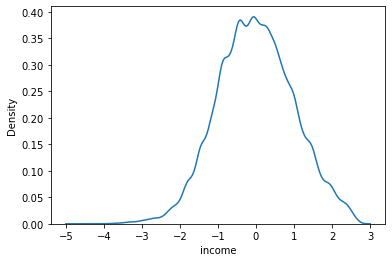

In [32]:
plt.clf()
sns.kdeplot(loans_pt.income)
plt.show()

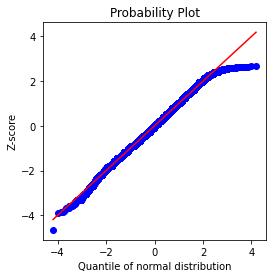

In [33]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(loans_pt.income, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()